In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils.validation import check_is_fitted
from yellowbrick.cluster import KElbowVisualizer

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [3]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv"
df = pd.read_csv(url, sep=';', index_col='ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [5]:
# Return the number of missing values in each column
for col in df.isnull().sum().index:
    if df[col].isnull().sum() > 0:
        print(f'{col} has {df[col].isnull().sum()} missing values')
        # Drop the rows with missing values
        df.dropna(inplace=True)
        print(f'{col} has {df[col].isnull().sum()} missing values')

Income has 24 missing values
Income has 0 missing values


In [6]:
df.head(2).T

ID,5524,2174
Year_Birth,1957,1954
Education,Graduation,Graduation
Marital_Status,Single,Single
Income,58138.0,46344.0
Kidhome,0,1
Teenhome,0,1
Dt_Customer,2012-09-04,2014-03-08
Recency,58,38
MntWines,635,11
MntFruits,88,1


## EDA

In [7]:
# ID column
if df.index.nunique() == df.shape[0]:
    print("No duplicate ID")
else:
    print("Duplicate ID")

No duplicate ID


In [8]:
Birth_Year = []
for i in df['Year_Birth']:
    pd.to_datetime(i, format='%Y')
    Birth_Year.append(pd.to_datetime(i, format='%Y', errors='coerce'))

df['Year_Birth'] = Birth_Year
df['Year_Birth'] = df['Year_Birth'].dt.year

Customer_Since = []
for i in df['Dt_Customer']:
    pd.to_datetime(i, format='%Y-%m-%d')
    Customer_Since.append(pd.to_datetime(i, format='%Y-%m-%d', errors='coerce'))

df['Dt_Customer'] =  Customer_Since
assert df['Dt_Customer'].dtype == 'datetime64[ns]', "Dt_Customer does not have datetime datatype"

df['Age'] =  datetime.now().year - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

df['Customer_Tenure'] = datetime.now().year - df['Dt_Customer'].dt.year
df.drop('Dt_Customer', axis=1, inplace=True)

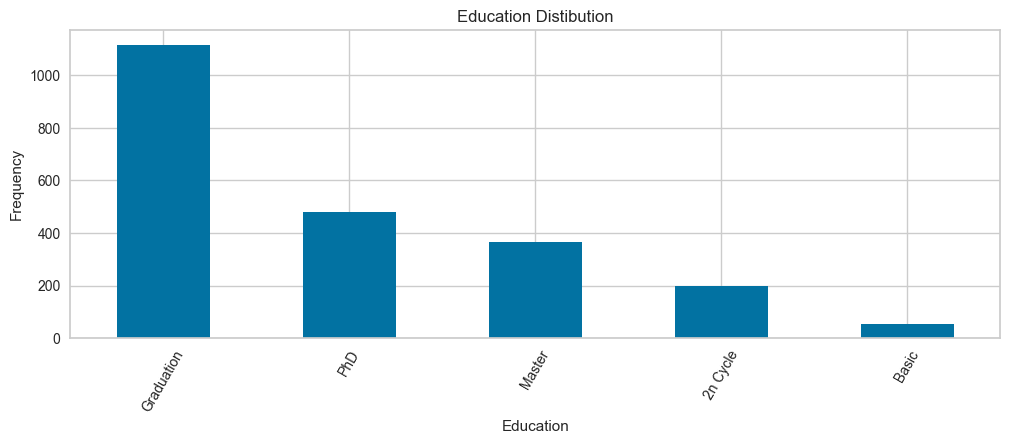

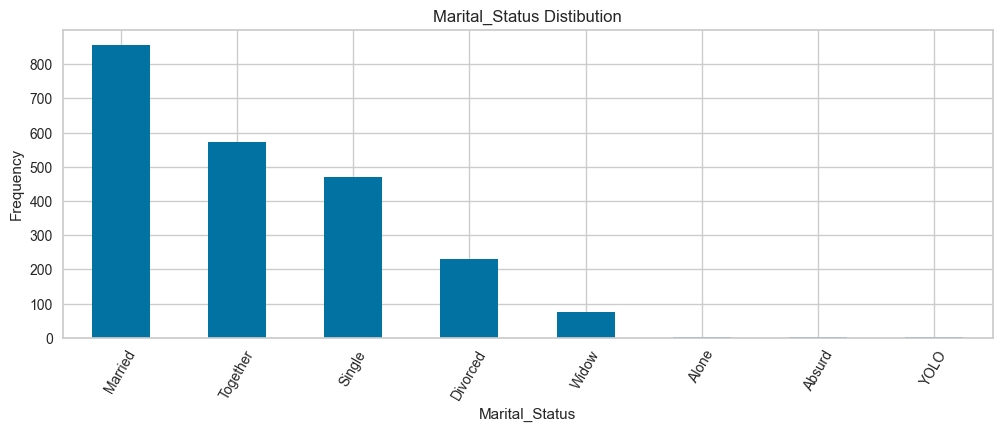

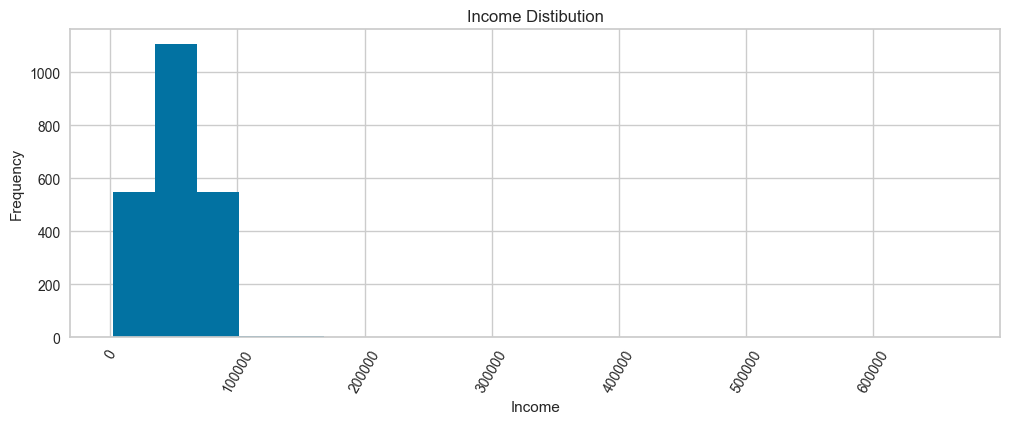

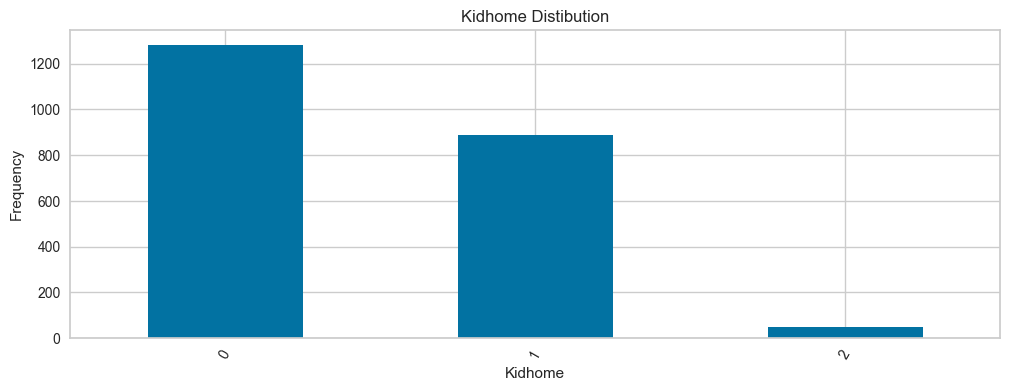

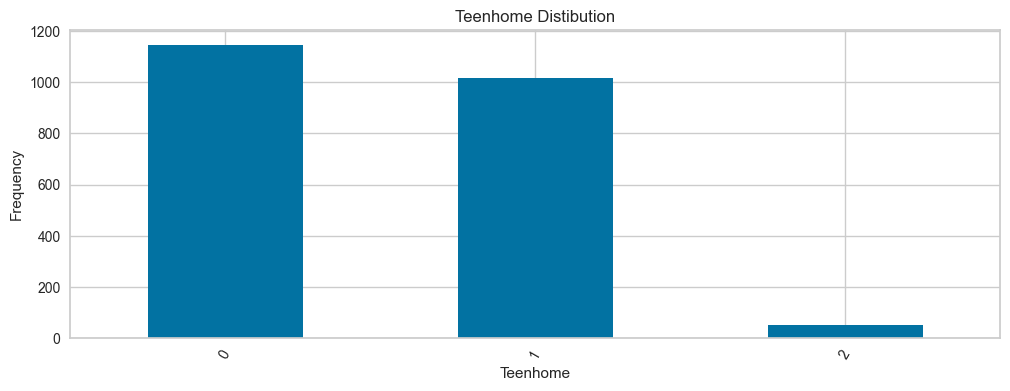

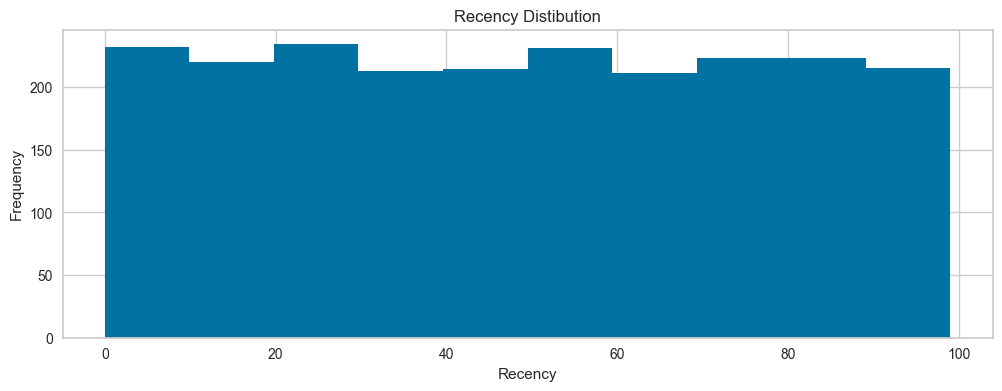

In [9]:
poeple_cols = df.columns[0:6]

int_cols = []

for col in poeple_cols:
    if df[col].dtype == 'object':
        plt.figure(figsize=(12, 4)) # Create a new figure for each plot
        df[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
        
    elif df[col].dtype == 'int64' and col != 'Recency':
        plt.figure(figsize=(12, 4)) # Create a new figure for each plot
        df[col].value_counts().plot(kind='bar')
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)

    elif df[col].dtype == 'float':
        plt.figure(figsize=(12, 4)) # Create a new figure for each plot
        plt.hist(df[col], bins=20)
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)
    
    elif col == "Recency":
        plt.figure(figsize=(12,4))
        plt.hist(df[col])
        plt.title(f'{col} Distibution')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')


MntFishProducts Total Expeniture:83405
MntSweetProducts Total Expeniture:59896
MntGoldProds Total Expeniture:97427
NumDealsPurchases Total Expeniture:5149
NumWebPurchases Total Expeniture:9053
NumCatalogPurchases Total Expeniture:5919


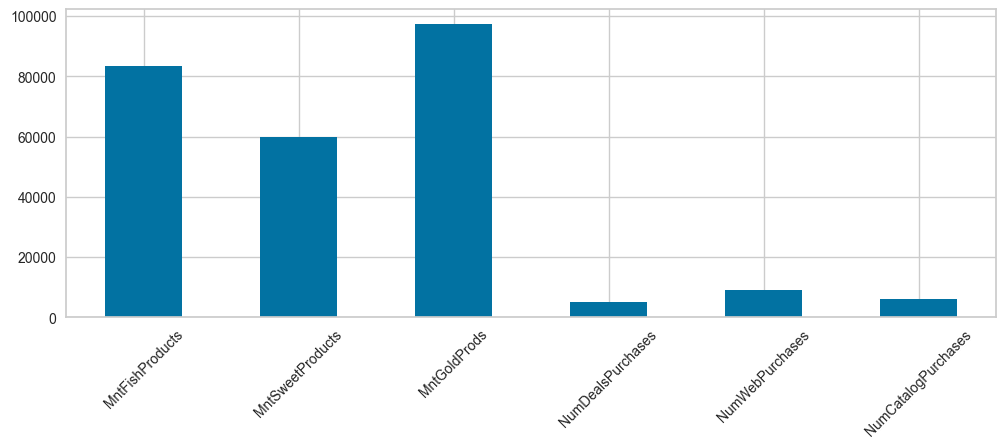

In [10]:
products_col = df.columns[9:15]
plt.figure(figsize=(12,4))
df[products_col].sum().plot(kind='bar')
plt.xticks(rotation=45)
for col in products_col:
    print(f'{col} Total Expeniture:{df[col].sum()}')
sns.set_style('darkgrid')

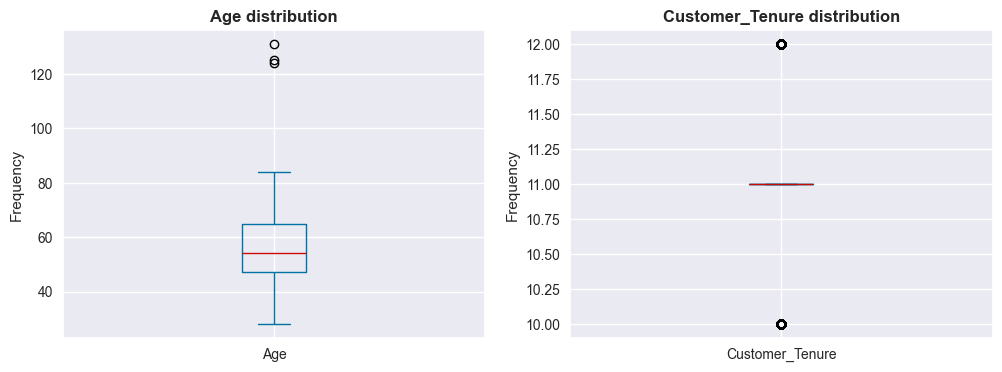

In [11]:
# Let's see the data disribution
plt.figure(figsize=(12, 4))

subplot_index = 1 # Initailize counter for subplot index

for col in df[['Age', 'Customer_Tenure']].columns:
    plt.subplot(1, 2, subplot_index)
    df[col].plot(kind = 'box', title = f'Distribution of {col} Reading')
    plt.ylabel('Frequency')
    plt.title(f'{col} distribution', weight='bold')

    subplot_index += 1 # Increment the subplot index

In [12]:
int_df = df.select_dtypes(include=['int64','int32' ,'float64'])
int_df = int_df.var().sort_values(ascending=False)
int_df

Income                 6.336838e+08
MntWines               1.137901e+05
MntMeatProducts        5.030299e+04
MntFishProducts        2.997791e+03
MntGoldProds           2.684837e+03
MntSweetProducts       1.686913e+03
MntFruits              1.583556e+03
Recency                8.380071e+02
Age                    1.436535e+02
NumStorePurchases      1.056760e+01
NumCatalogPurchases    8.565770e+00
NumWebPurchases        7.512813e+00
NumWebVisitsMonth      5.882364e+00
NumDealsPurchases      3.700682e+00
Customer_Tenure        4.700718e-01
Teenhome               2.961332e-01
Kidhome                2.882576e-01
Response               1.277471e-01
AcceptedCmp4           6.856109e-02
AcceptedCmp3           6.817624e-02
AcceptedCmp5           6.779099e-02
AcceptedCmp1           6.000033e-02
AcceptedCmp2           1.336066e-02
Complain               9.390967e-03
Z_CostContact          0.000000e+00
Z_Revenue              0.000000e+00
dtype: float64

In [13]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64'), dtype('int32')],
      dtype=object)

In [14]:
# Since we can't drop use all features we'll peak the features with the hightest variance

int_df = df.select_dtypes(include=['int64','int32' ,'float64'])
int_df = int_df.var().sort_values(ascending=False)

# print(int_df.var().sort_values(ascending=False))
# print(type(int_df.var().sort_values(ascending=False)))

high_var_cols = []
for col in int_df.index:
    if int_df[col] > 1:
        high_var_cols.append(col)

print(high_var_cols)

#We'll use the columns with the highest variance for out K-Means clustering
# We'll exclude all catergorical columns/variales
X = df[high_var_cols]

X.rename(columns = {
    "MntWines" : 'Wine',
    'MntMeatProducts' : 'Meat',
    "MntFishProducts" : 'Fish',
    "MntGoldProds" : 'Gold',
    "MntSweetProducts" : 'Sweet',
    "MntFruits" : 'Fruits',
    "NumStorePurchases" : 'Store_Purchases',
    "NumCatalogPurchases" : 'Catalog_Purchases',
    'NumWebPurchases' : 'Web_Purchases',
    "NumWebVisitsMonth" : 'Web_Visits',
    "NumDealsPurchases" : 'Deals_Purchases',
})

X.head(5)

['Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits', 'Recency', 'Age', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']


,Income,MntWines,MntMeatProducts,MntFishProducts,MntGoldProds,MntSweetProducts,MntFruits,Recency,Age,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,NumDealsPurchases
ID,,,,,,,,,,,,,,
5524,58138.0,635,546,172,88,88,88,58,67,4,10,8,7,3
2174,46344.0,11,6,2,6,1,1,38,70,2,1,1,5,2
4141,71613.0,426,127,111,42,21,49,26,59,10,2,8,4,1
6182,26646.0,11,20,10,5,3,4,26,40,4,0,2,6,2
5324,58293.0,173,118,46,15,27,43,94,43,6,3,5,5,5


In [15]:
X.aggregate(['mean', 'std']).astype(int)

,Income,MntWines,MntMeatProducts,MntFishProducts,MntGoldProds,MntSweetProducts,MntFruits,Recency,Age,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,NumDealsPurchases
mean,52247,305,166,37,43,27,26,49,55,5,2,4,5,2
std,25173,337,224,54,51,41,39,28,11,3,2,2,2,1


Since some variables have very low mean and standard deviation, while others have a fairly high mean and standard deviation, we can use standardization to bring all the variables to the same scale. using the StandardScaler function from the sklearn library.

In [16]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.aggregate(['mean', 'std']).astype(int)

,Income,MntWines,MntMeatProducts,MntFishProducts,MntGoldProds,MntSweetProducts,MntFruits,Recency,Age,NumStorePurchases,NumCatalogPurchases,NumWebPurchases,NumWebVisitsMonth,NumDealsPurchases
mean,0,0,0,0,0,0,0,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Elbow Method to determine the number of clusters to be formed:


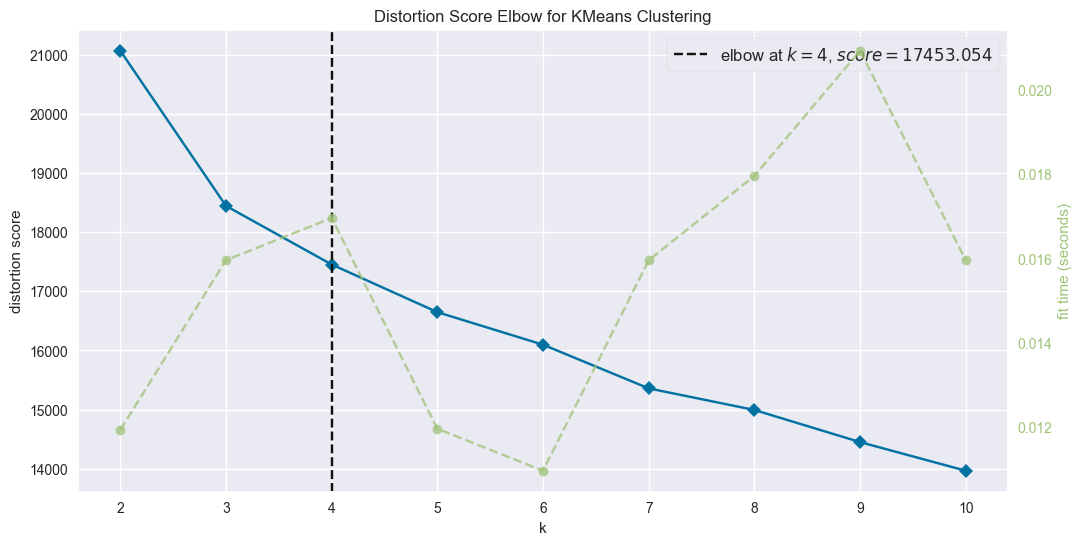

In [59]:
# Quick examination of elbow method to find numbers of clusters to make.
plt.figure(figsize=(12, 6))
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(X_scaled)
Elbow_M.show();

Further we  could get the ideal number of clusters using the onother Elbow Method where by we run a for loop over a set range of cluster values and calculate the inertia and silhouette score for each cluster value.

Inertia within cluster sum of squared distances of datapoints to their closest cluster center/centroid.

Calculated as:<code>sqrt((x1-c)**2 + (x2-c)**2) + ...)</code>

The lesser the inertia the better the model ie. the closer is to 0

Where as silhouette score is a measure of how close each data point is close to its own centroid compared to other centroid of onother cluster.(separation — cohesion) / max(separation, cohesion) ie  <code>(b - a) / max(a, b)</code>
where a is the average distance of data points in the same cluster and b is the average distance to the data points in the nearest cluster.

The best silhouette score should be closer to 1 whereas the worst score should be closer to -1.


In [18]:
n_clusters = range(2, 10)
inertias = []
silhouette_scores = []

for n in n_clusters:
    model = KMeans(n_clusters=n, random_state=42)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

    silhouette_scores.append(
        silhouette_score(X_scaled, model.labels_)
    
    )

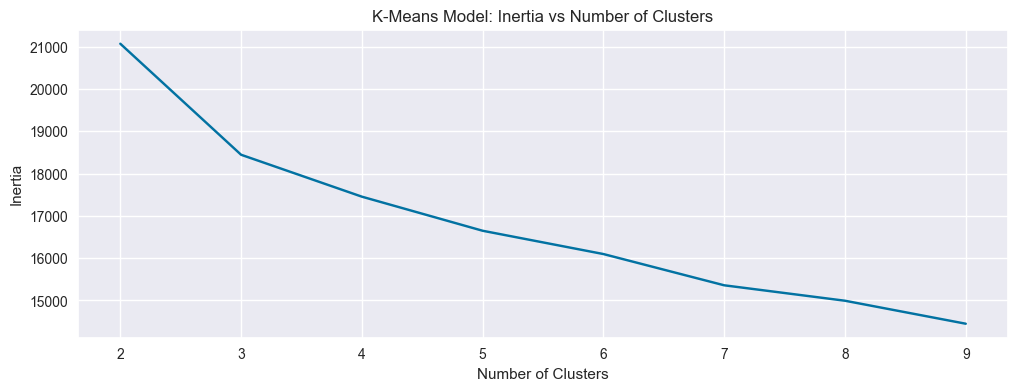

In [19]:
# Plot `inertia_errors` by `n_clusters`
plt.figure(figsize=(12, 4))
plt.plot(n_clusters, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-Means Model: Inertia vs Number of Clusters');

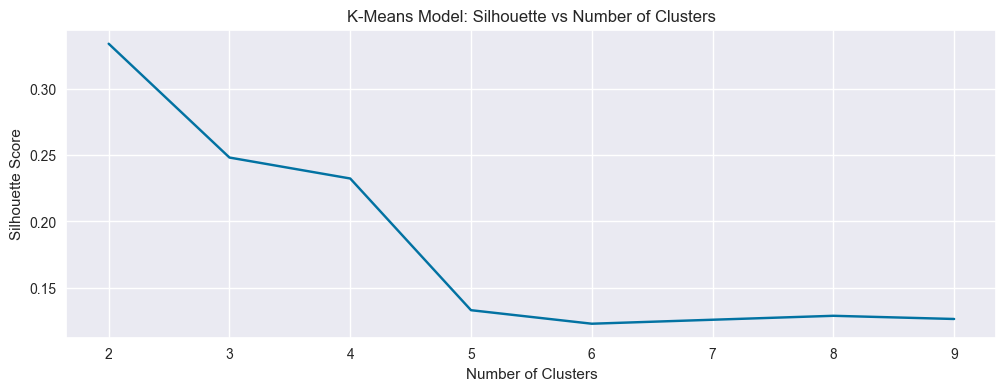

In [20]:
# Plot `inertia_errors` by `n_clusters`
plt.figure(figsize=(12, 4))
plt.plot(n_clusters, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Model: Silhouette vs Number of Clusters');

The best cluster will be 4 since in the silhouette score 5 hits the point of diminishing returns
This justifies the KElbowVisualizer plot and n_clusters recommendation

In [21]:
# Since we've know how to tune out hyperparameters we'll build our final model
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters = 4, random_state=42)
)

final_model.fit(X)

#check if model has been fit to data
check_is_fitted(final_model)

### Communicate Results

In [22]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Tenure'],
      dtype='object')

In [23]:
X.columns

Index(['Income', 'MntWines', 'MntMeatProducts', 'MntFishProducts',
       'MntGoldProds', 'MntSweetProducts', 'MntFruits', 'Recency', 'Age',
       'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases',
       'NumWebVisitsMonth', 'NumDealsPurchases'],
      dtype='object')

In [56]:
products_col=X.columns[1:7]
print(products_col)

place_cols=X.columns[9:]
print(f"'\n'{place_cols}")

inc_age_rec_col = []
for col in X.columns:
    if col not in products_col and col not in place_cols:
        inc_age_rec_col.append(col)

print(f'\n{inc_age_rec_col}')

Index(['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds',
       'MntSweetProducts', 'MntFruits'],
      dtype='object')
'
'Index(['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases',
       'NumWebVisitsMonth', 'NumDealsPurchases'],
      dtype='object')

['Income', 'Recency', 'Age']


In [58]:
products_df = X[products_col].groupby(labels).mean()
place_df= X[place_cols].groupby(labels).mean()
inc_age_rec_df = X[inc_age_rec_col].groupby(labels).mean()
df_list = [products_df, place_df, inc_age_rec_df]

    
# Corresponding list of column groups for each DataFrame
col_list = [products_col, place_cols, inc_age_rec_col]

# Iterate over each DataFrame and its respective columns
for idx, (df, cols) in enumerate(zip(df_list, col_list)):
    # Reset index to show clusters on the x-axis
    df = df.reset_index()

    # Plot the bar chart for each DataFrame
    plt.figure(figsize=(12, 8))

    fig = px.bar(
        df,
        x='index',  # Clusters
        y=cols,  # Mean values for each group of columns
        barmode='group',
        title=f'Mean Values by Cluster for DataFrame {idx+1}',  # Update title for each DataFrame
    )

    fig.update_layout(xaxis_title='Clusters', yaxis_title='Value [$]')
    
    # Show the figure for each DataFrame
    fig.show();


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>